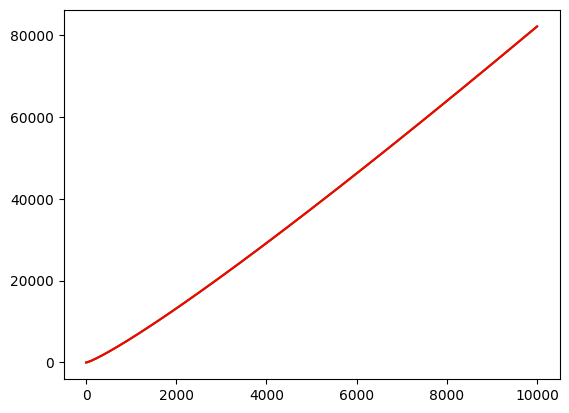

In [ ]:
from math import log,e,pi
import matplotlib.pyplot as plt
f=[]
g=[]
for n in range(1,10000):
  ans=0
  for i in range(1,n+1):
    ans+=log(i)
  f.append(ans)
  ans1=0.5*log(2*pi*n)+n*log(n/e)
  g.append(ans1)
x=range(1,10000)
plt.plot(x,f,color='g',label='normal')
plt.plot(x,g,color='r',label='formula')

Dice with 4 faces and probability distribution {0.25, 0.25, 0.2, 0.3}


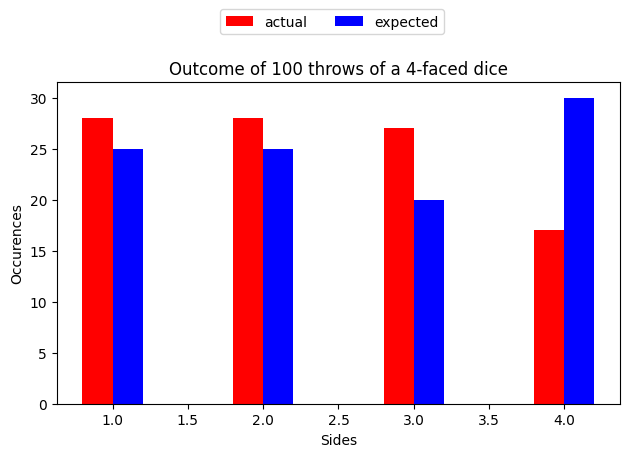

In [ ]:
import matplotlib.pyplot as plt
import random
import numpy as np

class CustomError(Exception):
  def __init__(self, message):
    self.message = message
  def __str__(self):
    return f"<class '{self.__class__.__name__}'> {self.message}"

class dice():
  def __init__(self,side=6):
    try:
      if side<4:
        raise CustomError("Dice cannot be constructed")
      elif type(side)!=int:
        raise CustomError("Dice cannot be constructed")
      self.sides=side
      self.tupp=tuple([1/self.sides for i in range(self.sides)])
    except CustomError as ce:
      print(ce)

  def setProb(self,tup):
    try:
      if len(tup)!=self.sides:
        raise CustomError("Invalid probability distribution")
      elif sum(tup)!=1:
        raise CustomError("Invalid probability distribution")
      else:
        self.tupp=tup
    except CustomError as ce:
      print(ce)

  def roll(self,n):
    actual=np.zeros(self.sides)
    for i in range(n):
      x=random.randint(0,self.sides-1)
      actual[x]+=1
    expected=[n*i for i in list(self.tupp)]
    plt.bar([i-0.1 for i in range(1,self.sides+1)],actual,0.2,color='r',label='actual')
    plt.bar([i+0.1 for i in range(1,self.sides+1)],expected,0.2,color='b',label='expected')
    plt.xlabel("Sides")
    plt.ylabel("Occurences")
    plt.title(f"Outcome of {n} throws of a {self.sides}-faced dice")
    plt.legend(ncol=2, bbox_to_anchor=(0.7,1.25))
    plt.tight_layout()
    plt.show()

  def __str__(self):
    output=", ".join(str(i) for i in self.tupp)
    return f"Dice with {self.sides} faces and probability distribution "+ "{" + f"{output}" +  "}"

d=dice(4)
d.setProb((0.25,0.25,0.20,0.30))
print(d)
d.roll(100)

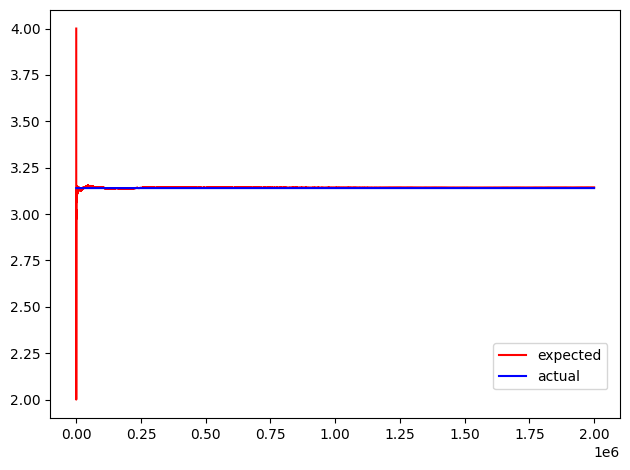

In [ ]:
import random
import matplotlib.pyplot as plt
def estimatePi(n):
  circle=0
  graph=[]
  for points in range(1,n+1):
    x=random.uniform(-1,1)
    y=random.uniform(-1,1)
    if (pow(x,2)+pow(y,2))<=1:
      circle+=1
    graph.append(4*circle/points)
  plt.plot(range(1,n+1),graph,color='r',label='expected')
  plt.plot(range(1,n+1),[3.14]*n,color='b',label='actual')
  plt.legend(bbox_to_anchor=(0.99,0.2))
  plt.tight_layout()
  plt.show()
estimatePi(2000000)

In [ ]:
import numpy as np
import random

class CustomError(Exception):
  def __init__(self, message):
    self.message = message
  def __str__(self):
    return f"<class '{self.__class__.__name__}'> {self.message}"

class TextGenerator():
  def assimilatetext(self,filename):
    self.dictionary={}
    with open(filename,'r') as filecontent:
      text=filecontent.read()
    text=text.replace(".","")
    text=text.replace(",","")
    text=text.replace("“","")
    text=text.replace("”","")
    text=text.replace("‘","")
    text=text.replace("!","")
    text=text.replace("?","")
    text=text.replace(";","")
    text=text.replace(":","")
    lines=text.split("\n")
    words=[]
    for line in lines:
      for word in line.split(" "):
        words.append(word)

    for i in range(0,len(words)-2):
      if(words[i],words[i+1]) not in self.dictionary:
        self.dictionary[(words[i],words[i+1])]=words[i+2]

  def generatetext(self,n,first_word=""):
      output=[]
      if first_word!="":
        n=n-3
        flag=0
        for k in self.dictionary.keys():
          if k[0]==first_word:
            flag=1
            output.append(k[0])
            output.append(k[1])
            output.append(self.dictionary[k])
            break
        if flag==0:
          raise CustomError("Unable to produce text with the specified start word.")
      num_tuples=int(np.ceil(n/3))
      generated=random.sample(self.dictionary.keys(),num_tuples)

      for k in generated:
        output.append(k[0])
        n-=1
        if n>0:
          output.append(k[1])
          n-=1
        if n>0:
          output.append(self.dictionary[k])
          n-=1
      print(" ".join(output))
      print(len(output))
t=TextGenerator()
t.assimilatetext("/content/sherlock.txt")
t.generatetext(100,"London")

London slavey As A series of matter and I Whoa there whoa murderer So and the plugs and possibility But I number Next day and gentlemanly he was certain that upon conjecture and to London by appearance We shall not join in of I have swaying to and Dirty  Yes wife I did carriage drove away and sickness came Or should you possible you do ever he set after father’s death got if he over twenty years business was still and lethargy which lateness caused me more before I out while I and dottles left benefactor of the habit
100


<ipython-input-19-dfb31c1b5d4f>:49: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  generated=random.sample(self.dictionary.keys(),num_tuples)


In [ ]:
l=[1,2,3]
b=[6,7,8]
b=l
l[0]=10
print(b)

[10, 2, 3]
